In [1]:
import numpy as np
import pandas as pd

## Regression Model

In [3]:
dataFm = pd.read_csv("MY2022_Fuel _Consumption_Ratings.csv")

In [4]:
dataFm.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [18]:
dataFrame=dataFm.drop(columns=['Make','Model','Vehicle Class','Transmission','Fuel Type'])

In [20]:
dataFrame.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [21]:
dataFrame.isnull().sum()

Model Year                           0
Engine Size(L)                       0
Cylinders                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [22]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Engine Size(L)                     946 non-null    float64
 2   Cylinders                          946 non-null    int64  
 3   Fuel Consumption (City (L/100 km)  946 non-null    float64
 4   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 5   Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 6   Fuel Consumption(Comb (mpg))       946 non-null    int64  
 7   CO2 Emissions(g/km)                946 non-null    int64  
 8   CO2 Rating                         946 non-null    int64  
 9   Smog Rating                        946 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 74.0 KB


<Figure size 504x360 with 0 Axes>

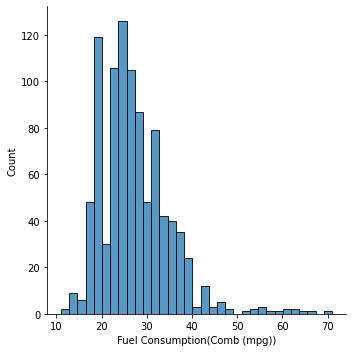

In [23]:
plt.figure(figsize=(7,5))
sbn.displot(dataFrame["Fuel Consumption(Comb (mpg))"]) 

<AxesSubplot:xlabel='Cylinders', ylabel='Fuel Consumption(Comb (mpg))'>

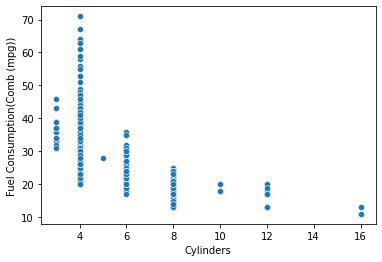

In [24]:
sbn.scatterplot(x="Cylinders",y="Fuel Consumption(Comb (mpg))",data=dataFrame)


In [25]:
dataFrame.sort_values("Fuel Consumption(Comb (mpg))",ascending=False).head(20)


,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
460,2022,1.6,4,4.0,3.9,4.0,71,94,10,7
459,2022,1.6,4,4.3,4.1,4.2,67,99,9,7
458,2022,1.6,4,4.5,4.2,4.4,64,103,9,7
885,2022,1.8,4,4.4,4.5,4.5,63,106,9,7
895,2022,1.8,4,4.4,4.7,4.5,63,106,9,7
539,2022,1.6,4,4.4,4.9,4.6,61,110,9,7
540,2022,1.6,4,4.4,4.9,4.6,61,110,9,7
896,2022,1.8,4,4.6,5.0,4.8,59,111,9,7
874,2022,2.5,4,4.9,4.8,4.9,58,113,9,7
432,2022,2.0,4,5.0,5.0,5.0,56,117,9,7


In [32]:
len(dataFrame)*0.02

18.92

In [33]:
newDataFrame=dataFrame.sort_values("Fuel Consumption(Comb (mpg))",ascending=False).iloc[19:]

In [34]:
newDataFrame.describe()


,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,927.0,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,2022.0,3.222762,5.702265,12.661704,9.450054,11.216505,26.638619,262.069040,4.451996,4.908306
std,0.0,1.377343,1.937419,3.309671,2.223062,2.768333,6.392316,61.773917,1.351590,1.670868
min,2022.0,1.200000,3.000000,5.600000,5.500000,6.000000,11.000000,140.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.400000,7.800000,9.200000,22.000000,216.000000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.300000,9.200000,10.900000,26.000000,259.000000,4.000000,5.000000
75%,2022.0,4.000000,6.000000,14.700000,10.700000,12.950000,31.000000,302.000000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,47.000000,608.000000,8.000000,7.000000


<Figure size 504x360 with 0 Axes>

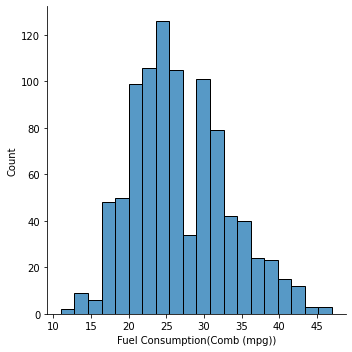

In [35]:
plt.figure(figsize=(7,5))
sbn.displot(newDataFrame["Fuel Consumption(Comb (mpg))"])

In [36]:
dataFrame.groupby("Engine Size(L)").mean()["Fuel Consumption(Comb (mpg))"]


Engine Size(L)
1.2    40.250000
1.3    32.875000
1.4    34.500000
1.5    36.562500
1.6    44.391304
1.8    45.222222
2.0    31.823810
2.3    25.153846
2.4    29.142857
2.5    34.375000
2.7    24.000000
2.8    26.600000
2.9    23.882353
3.0    25.656716
3.2    26.666667
3.3    23.428571
3.4    23.571429
3.5    25.120000
3.6    24.723404
3.7    20.500000
3.8    21.750000
4.0    21.225000
4.4    21.120000
4.6    19.000000
5.0    20.812500
5.2    18.636364
5.3    18.775510
5.6    18.500000
5.7    21.133333
6.0    17.250000
6.2    19.030303
6.4    20.111111
6.5    13.000000
6.6    19.000000
6.7    17.000000
8.0    11.666667
Name: Fuel Consumption(Comb (mpg)), dtype: float64

In [37]:
dataFrame.groupby("Smog Rating").mean()["Fuel Consumption(Comb (mpg))"]


Smog Rating
1    21.421053
3    23.323232
5    26.873377
6    24.857143
7    35.886598
Name: Fuel Consumption(Comb (mpg)), dtype: float64

In [38]:
dataFrame.groupby("CO2 Emissions(g/km)").mean()["Fuel Consumption(Comb (mpg))"]


CO2 Emissions(g/km)
94     71.0
99     67.0
103    64.0
106    63.0
110    61.0
       ... 
465    14.0
489    13.0
498    13.0
522    13.0
608    11.0
Name: Fuel Consumption(Comb (mpg)), Length: 242, dtype: float64

In [39]:
newDataFrame2=newDataFrame.drop(columns=['Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))',
                                         'Fuel Consumption(Comb (L/100 km))'])

In [41]:
newDataFrame2.head(20)

,Model Year,Engine Size(L),Cylinders,Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
609,2022,2.0,4,47,140,8,7
915,2022,2.5,4,46,142,8,7
717,2022,1.2,3,46,143,8,5
339,2022,2.5,4,45,147,8,6
454,2022,2.0,4,44,151,7,5
476,2022,1.6,4,44,152,7,7
718,2022,1.2,3,43,151,8,5
549,2022,1.6,4,43,157,7,7
905,2022,2.5,4,43,154,7,7
879,2022,2.0,4,42,159,7,7


In [ ]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [56]:
newDataFrame2.rename(columns={'Fuel Consumption(Comb (mpg))':'Target'},inplace=True)

In [57]:
newDataFrame2

,Model Year,Engine Size(L),Cylinders,Target,CO2 Emissions(g/km),CO2 Rating,Smog Rating
609,2022,2.0,4,47,140,8,7
915,2022,2.5,4,46,142,8,7
717,2022,1.2,3,46,143,8,5
339,2022,2.5,4,45,147,8,6
454,2022,2.0,4,44,151,7,5
...,...,...,...,...,...,...,...
558,2022,6.5,12,13,498,1,1
398,2022,5.3,8,13,358,2,3
557,2022,6.5,12,13,498,1,1
133,2022,8.0,16,11,608,1,1


In [58]:
from sklearn.model_selection import train_test_split

y = newDataFrame2["Target"].values
x = newDataFrame2.drop("Target",axis=1).values

In [59]:
print("X attribute",x)


X attribute [[2.022e+03 2.000e+00 4.000e+00 1.400e+02 8.000e+00 7.000e+00]
 [2.022e+03 2.500e+00 4.000e+00 1.420e+02 8.000e+00 7.000e+00]
 [2.022e+03 1.200e+00 3.000e+00 1.430e+02 8.000e+00 5.000e+00]
 ...
 [2.022e+03 6.500e+00 1.200e+01 4.980e+02 1.000e+00 1.000e+00]
 [2.022e+03 8.000e+00 1.600e+01 6.080e+02 1.000e+00 1.000e+00]
 [2.022e+03 8.000e+00 1.600e+01 6.080e+02 1.000e+00 1.000e+00]]


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(len(x_train))
print(len(x_test))

648
279


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train.shape


(648, 6)

In [63]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(6,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [64]:
model.fit(x=x_train, y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)


Epoch 1/300
3/3 [==============================] - 0s 53ms/step - loss: 756.1387 - val_loss: 753.0115
Epoch 2/300
3/3 [==============================] - 0s 13ms/step - loss: 754.9963 - val_loss: 751.9211
Epoch 3/300
3/3 [==============================] - 0s 13ms/step - loss: 753.9204 - val_loss: 750.8991
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 752.9043 - val_loss: 749.9350
Epoch 5/300
3/3 [==============================] - 0s 15ms/step - loss: 751.9485 - val_loss: 749.0162
Epoch 6/300
3/3 [==============================] - 0s 14ms/step - loss: 751.0314 - val_loss: 748.1725
Epoch 7/300
3/3 [==============================] - 0s 13ms/step - loss: 750.2223 - val_loss: 747.4607
Epoch 8/300
3/3 [==============================] - 0s 14ms/step - loss: 749.5255 - val_loss: 746.7728
Epoch 9/300
3/3 [==============================] - 0s 13ms/step - loss: 748.8296 - val_loss: 746.0500
Epoch 10/300
3/3 [==============================] - 0s 14ms/step - loss: 748.1061 

In [66]:
lossData = pd.DataFrame(model.history.history)
lossData.head()

,loss,val_loss
0,756.138672,753.011475
1,754.996277,751.921143
2,753.920410,750.899109
3,752.904297,749.934998
4,751.948486,749.016174


<AxesSubplot:>

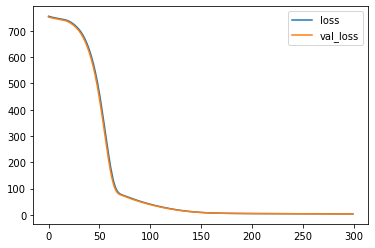

In [69]:
lossData.plot()


In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictArray = model.predict(x_test)
predictArray

9/9 [==============================] - 0s 857us/step


array([[32.22529 ],
       [27.693953],
       [38.003716],
       [34.761665],
       [20.320477],
       [16.467825],
       [29.6115  ],
       [32.472847],
       [29.157986],
       [28.622252],
       [38.771828],
       [25.008345],
       [20.292095],
       [20.126423],
       [24.230167],
       [29.405539],
       [20.008703],
       [28.673653],
       [33.364403],
       [23.704111],
       [29.884459],
       [28.746029],
       [37.926357],
       [20.334143],
       [29.596031],
       [19.776585],
       [27.807636],
       [19.881083],
       [28.823391],
       [20.322289],
       [20.315222],
       [30.065016],
       [23.84336 ],
       [28.7615  ],
       [16.768204],
       [20.320477],
       [27.817732],
       [26.786919],
       [23.962421],
       [35.173664],
       [30.622015],
       [20.334143],
       [30.333418],
       [30.591068],
       [17.107306],
       [29.73528 ],
       [30.023708],
       [19.928326],
       [19.45364 ],
       [37.84932 ],


In [71]:
mean_absolute_error(y_test,predictArray)


1.2828155196268498

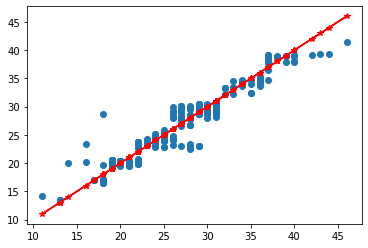

In [72]:
plt.scatter(y_test,predictArray)
plt.plot(y_test,y_test,"r-*")

In [73]:
mean_squared_error(y_test,predictArray)


3.2892953457688865

In [75]:
train_lossScore=model.evaluate(x_train,y_train,verbose=0)
print("Train loss score: ",train_lossScore)

Train loss score:  3.2736284732818604


In [76]:
test_lossScore=model.evaluate(x_test,y_test,verbose=0)
print("Test loss score: ",test_lossScore)

Test loss score:  3.2892956733703613


In [77]:
TestTahminleri = model.predict(x_test)


9/9 [==============================] - 0s 877us/step


In [78]:
TestTahminleri.shape


(279, 1)

In [79]:
tahminDf=pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDf

,Gerçek Y
0,32
1,27
2,40
3,37
4,20
...,...
274,26
275,20
276,19
277,34


In [81]:
TestTahminleri = pd.Series(TestTahminleri.reshape(279 ,))

tahminDf = pd.concat([tahminDf,TestTahminleri],axis=1)

tahminDf

,Gerçek Y,0
0,32,32.225288
1,27,27.693953
2,40,38.003716
3,37,34.761665
4,20,20.320477
...,...,...
274,26,24.869349
275,20,20.311016
276,19,20.494036
277,34,34.560524


In [82]:
tahminDf.columns = ["Gerçek Y","Tahmin Y"]
tahminDf

,Gerçek Y,Tahmin Y
0,32,32.225288
1,27,27.693953
2,40,38.003716
3,37,34.761665
4,20,20.320477
...,...,...
274,26,24.869349
275,20,20.311016
276,19,20.494036
277,34,34.560524


<AxesSubplot:xlabel='Gerçek Y', ylabel='Tahmin Y'>

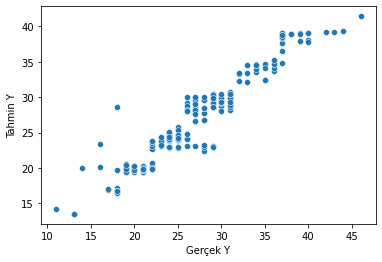

In [83]:
sbn.scatterplot(x="Gerçek Y",y="Tahmin Y",data=tahminDf)
